<a href="https://colab.research.google.com/github/pscabral/IFMA_Softex/blob/main/Untitled150.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Bangkit-JKT2-D/fruits-fresh-rotten-classification.git

Cloning into 'fruits-fresh-rotten-classification'...
remote: Enumerating objects: 13804, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (171/171), done.
remote: Total 13804 (delta 55), reused 106 (delta 15), pack-reused 13618
Receiving objects: 100% (13804/13804), 1.79 GiB | 32.95 MiB/s, done.
Resolving deltas: 100% (57/57), done.
Updating files: 100% (13693/13693), done.


In [ ]:
new_path = '/content/fruits-fresh-rotten-classification'
for dirname, _, filenames in os.walk(new_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [40]:
train_path = '/content/fruits-fresh-rotten-classification/Datasets/train'
test_path = '/content/fruits-fresh-rotten-classification/Datasets/test'

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import random
import os

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array,load_img
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import GlobalAveragePooling2D,GlobalMaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,classification_report

In [76]:
def load_rand():
    X=[]
    dir_path='/content/fruits-fresh-rotten-classification/Datasets/train'
    for sub_dir in tqdm(os.listdir(dir_path)):
        path_main=os.path.join(dir_path,sub_dir)
        i=0
        for img_name in os.listdir(path_main):
            if i>=6:
                break
            img=cv2.imread(os.path.join(path_main,img_name))
            img=cv2.resize(img,(224,224))
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            X.append(img)
            i+=1
    return X

In [77]:
images_arr=np.array(load_rand())
images_arr.shape

100%|██████████| 6/6 [00:00<00:00, 15.76it/s]


(36, 224, 224, 3)

In [78]:
def show_subpot(X,title=False,Y=None):
    if X.shape[0]==36:
        f, ax= plt.subplots(6,6, figsize=(40,60))
        list_fruits=['rottenbanana','freshoranges','rottenoranges', 'freshbanana', 'rottenapples',   'freshapples']
        for i,img in enumerate(X):
            ax[i//6][i%6].imshow(img, aspect='auto')
            if title==False:
                ax[i//6][i%6].set_title(list_fruits[i//6])
            elif title and Y is not None:
                ax[i//6][i%6].set_title(Y[i])
        plt.show()
    else:
        print('Cannot plot')

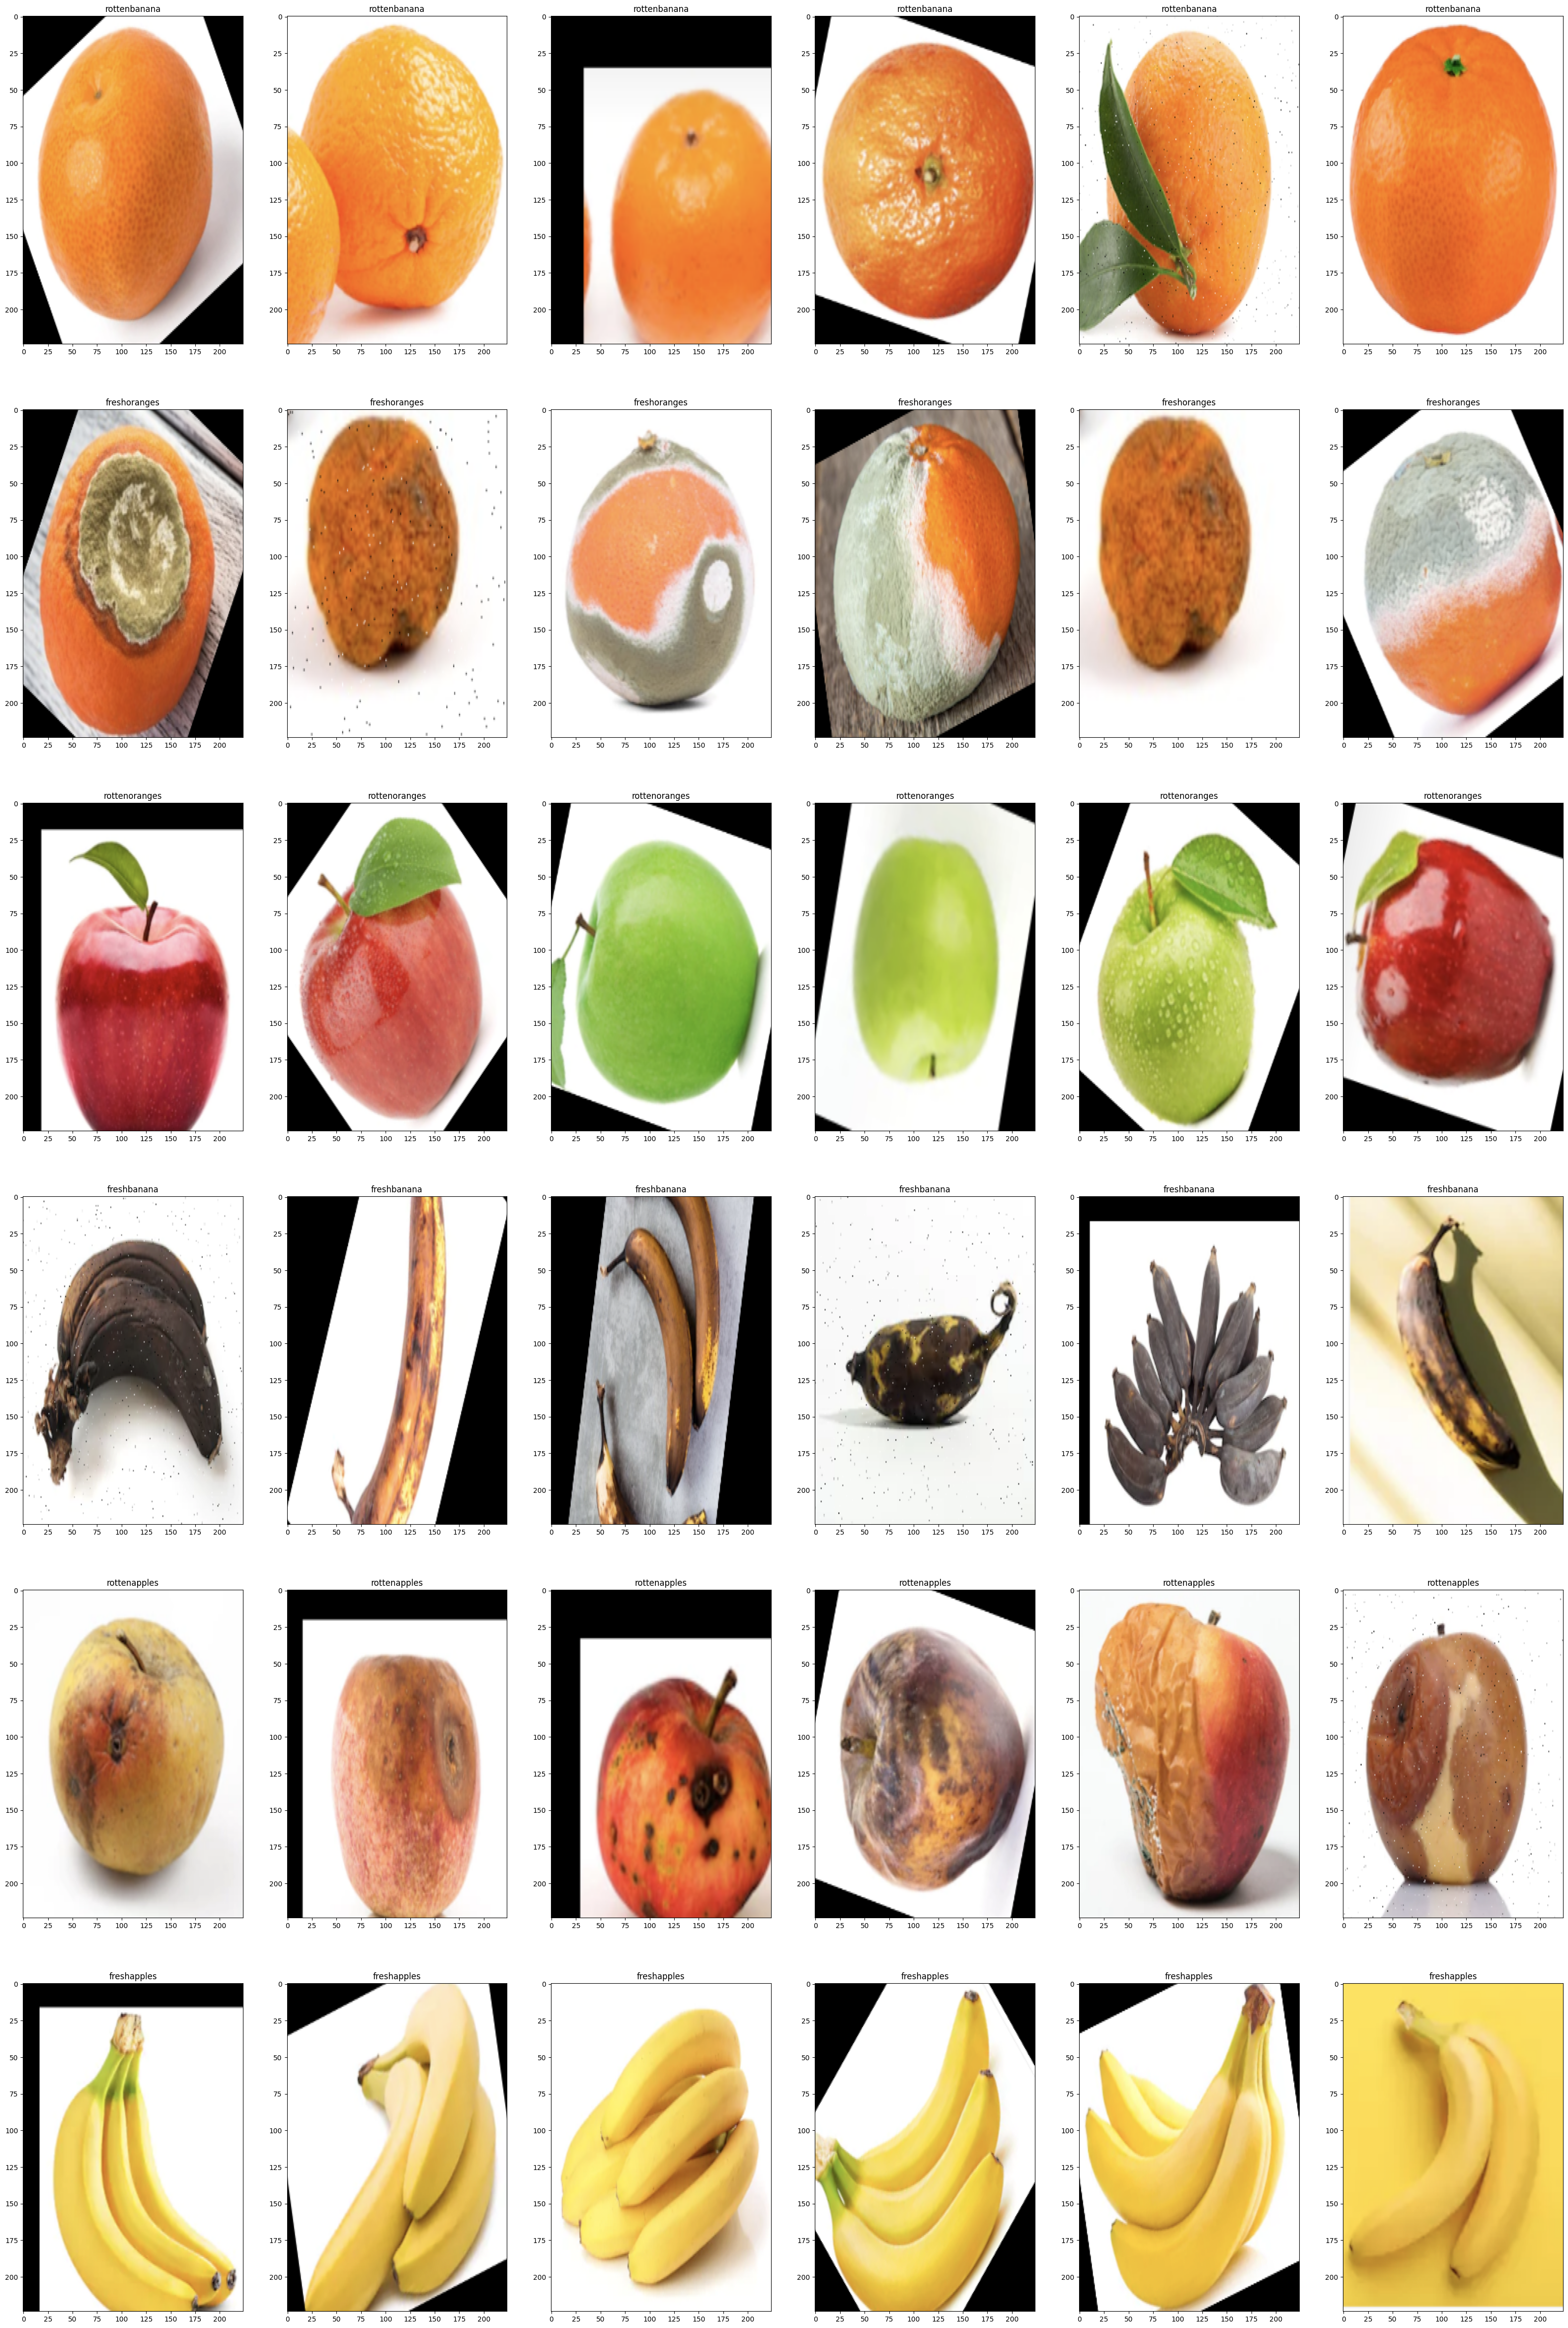

In [79]:
show_subpot(images_arr)

In [80]:
# Train path + Test path
train_dir = '../content/fruits-fresh-rotten-classification/Datasets/train'
test_dir = './content/fruits-fresh-rotten-classification/Datasets/test'

# Train Dataset

train_dir = '../content/fruits-fresh-rotten-classification/Datasets/train'
#fresh
fresh_apples_train_dir = os.path.join(train_dir, 'freshapples')
fresh_banana_train_dir = os.path.join(train_dir, 'freshbanana')
fresh_oranges_train_dir = os.path.join(train_dir, 'freshoranges')

#rotten
rotten_apples_train_dir = os.path.join(train_dir, 'rottenapples')
rotten_banana_train_dir = os.path.join(train_dir, 'rottenbanana')
rotten_oranges_train_dir = os.path.join(train_dir, 'rottenoranges')


# Test Dataset
test_dir = '../content/fruits-fresh-rotten-classification/Datasets/train'
#fresh
fresh_apples_test_dir = os.path.join(test_dir, 'freshapples')
fresh_banana_test_dir = os.path.join(test_dir, 'freshbanana')
fresh_oranges_test_dir = os.path.join(test_dir, 'freshoranges')

#rotten
rotten_apples_test_dir = os.path.join(test_dir, 'rottenapples')
rotten_banana_test_dir = os.path.join(test_dir, 'rottenbanana')
rotten_oranges_test_dir = os.path.join(test_dir, 'rottenoranges')

fresh_apples_train_len=len(os.listdir(fresh_apples_train_dir))
fresh_banana_train_len=len(os.listdir(fresh_banana_train_dir))
fresh_oranges_train_len=len(os.listdir(fresh_oranges_train_dir))
rotten_apples_train_len=len(os.listdir(rotten_apples_train_dir))
rotten_banana_train_len=len(os.listdir(rotten_banana_train_dir))
rotten_oranges_train_len=len(os.listdir(rotten_oranges_train_dir))

# Train Dataset

print("Images of Training Dataset")
print("No. of train fresh apple images : ", fresh_apples_train_len)
print("No. of train fresh banana images : ", fresh_banana_train_len)
print("No. of train fresh orange images : ", fresh_oranges_train_len)
print("No. of train rotten apple images : ", rotten_apples_train_len)
print("No. of train rotten banana images : ", rotten_banana_train_len)
print("No. of train rotten orange images : ", rotten_oranges_train_len)

print(".........................")

# Test Dataset

print("Images of Testing Dataset")
print("No. of test fresh apple images : ", len(os.listdir(fresh_apples_test_dir)))
print("No. of test fresh banana images : ", len(os.listdir(fresh_banana_test_dir)))
print("No. of test fresh orange images : ", len(os.listdir(fresh_oranges_test_dir)))
print("No. of test rotten apple images : ", len(os.listdir(rotten_apples_test_dir)))
print("No. of test rotten banana images : ", len(os.listdir(rotten_banana_test_dir)))
print("No. of test rotten orange images : ", len(os.listdir(rotten_oranges_test_dir)))

# Getting labels of training data
labels = os.listdir('/content/fruits-fresh-rotten-classification/Datasets/train')
print("Classes names:")
print(".......")
labels

Images of Training Dataset
No. of train fresh apple images :  1693
No. of train fresh banana images :  1581
No. of train fresh orange images :  1466
No. of train rotten apple images :  2342
No. of train rotten banana images :  2224
No. of train rotten orange images :  1595
.........................
Images of Testing Dataset
No. of test fresh apple images :  1693
No. of test fresh banana images :  1581
No. of test fresh orange images :  1466
No. of test rotten apple images :  2342
No. of test rotten banana images :  2224
No. of test rotten orange images :  1595
Classes names:
.......


['freshoranges',
 'rottenoranges',
 'freshapples',
 'rottenbanana',
 'rottenapples',
 'freshbanana']

In [81]:
datagen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.1,
  horizontal_flip=True,
  vertical_flip=True,
  rescale=1./255,
  validation_split=0.2,
#    validation_split : The fraction of images reserved for validation (strictly between 0 and 1).
#    So if the value of 0.2 is used then 20% samples will be reserved for the validation set and remaining 80% for the training set.
  preprocessing_function=keras.applications.vgg16.preprocess_input
  )

datagen1= ImageDataGenerator(
  rescale=1./255)

datagen2 = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.1,
  horizontal_flip=True,
  vertical_flip=True,
  rescale=1./255,
  #preprocessing_function=keras.applications.vgg16.preprocess_input
  )

In [82]:
#train and test dataset paths
train_path='../content/fruits-fresh-rotten-classification/Datasets/train'
test_path='../content/fruits-fresh-rotten-classification/Datasets/test'

# load and iterate training dataset
train_generator = datagen.flow_from_directory(train_path,
                                       target_size=[224,224],
                                       color_mode='rgb',
                                       class_mode="categorical",
                                       batch_size = 32,
                                       shuffle=True,
                                       subset='training')


validation_generator = datagen.flow_from_directory(train_path,
                                       target_size=[224,224],
                                       color_mode='rgb',
                                       class_mode="categorical",
                                       batch_size = 32,
                                       shuffle=True,
                                       subset='validation')

total_train_generator = datagen2.flow_from_directory(train_path,
                                       target_size=[224,224],
                                       color_mode='rgb',
                                       class_mode="categorical",
                                       batch_size = 32,
                                       shuffle=True)

# load and iterate testing dataset
test_generator = datagen1.flow_from_directory(test_path,
                                      target_size=[224,224],
                                      color_mode='rgb',
                                      class_mode="categorical",
                                      batch_size = 32)

Found 8723 images belonging to 6 classes.
Found 2178 images belonging to 6 classes.
Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [83]:
train_generator.class_indices

{'freshapples': 0,
 'freshbanana': 1,
 'freshoranges': 2,
 'rottenapples': 3,
 'rottenbanana': 4,
 'rottenoranges': 5}

In [84]:
validation_generator.class_indices

{'freshapples': 0,
 'freshbanana': 1,
 'freshoranges': 2,
 'rottenapples': 3,
 'rottenbanana': 4,
 'rottenoranges': 5}

In [85]:
total_train_generator.class_indices

{'freshapples': 0,
 'freshbanana': 1,
 'freshoranges': 2,
 'rottenapples': 3,
 'rottenbanana': 4,
 'rottenoranges': 5}

In [86]:
test_generator.class_indices

{'freshapples': 0,
 'freshbanana': 1,
 'freshoranges': 2,
 'rottenapples': 3,
 'rottenbanana': 4,
 'rottenoranges': 5}

In [87]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models


model0 = keras.models.Sequential()

model0.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model0.add(layers.MaxPooling2D((2, 2)))

model0.add(layers.Conv2D(64, (3, 3), activation='relu'))
model0.add(layers.MaxPooling2D((2, 2)))

model0.add(layers.Conv2D(128, (3, 3), activation='relu'))
model0.add(layers.MaxPooling2D((2, 2)))

model0.add(layers.Conv2D(128, (3, 3), activation='relu'))
model0.add(layers.MaxPooling2D((2, 2)))

model0.add(layers.Flatten())

model0.add(layers.Dense(512, activation='relu'))
model0.add(layers.Dense(6,activation='softmax'))

In [88]:
model0.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 26, 26, 128)      

In [89]:
model0.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history0 = model0.fit(total_train_generator,
          validation_data=test_generator,
          steps_per_epoch=total_train_generator.samples/total_train_generator.batch_size,
          validation_steps=test_generator.samples/test_generator.batch_size,
          epochs=20)

Epoch 1/20
340/340 [==============================] - 1490s 4s/step - loss: 0.7520 - accuracy: 0.7114 - val_loss: 0.3850 - val_accuracy: 0.8629
Epoch 2/20
340/340 [==============================] - 1486s 4s/step - loss: 0.3445 - accuracy: 0.8723 - val_loss: 0.3212 - val_accuracy: 0.8866
Epoch 3/20
310/340 [==========================>...] - ETA: 2:08 - loss: 0.3061 - accuracy: 0.8888